In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt
import seaborn as sns

## DATA PREP

In [759]:
games = pd.read_csv(r"C:\Users\guyzalcman\Downloads\stats_project\games.csv")
teams = pd.read_csv(r"C:\Users\guyzalcman\Downloads\stats_project\teams.csv")

In [760]:
games = games[["GAME_DATE_EST","GAME_ID", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "SEASON", "PTS_home","FG_PCT_home",'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away','REB_away', 'HOME_TEAM_WINS']]

teams = teams[['TEAM_ID','NICKNAME']]

games1 = games.merge(teams, how = "left", left_on = "HOME_TEAM_ID", right_on = "TEAM_ID")

games1.rename({"NICKNAME" : "HOME_TEAM"}, axis = 1, inplace = True)

games2 = games1.merge(teams, how = "left", left_on = "VISITOR_TEAM_ID", right_on = "TEAM_ID")

games2.rename({"NICKNAME" : "AWAY_TEAM"}, axis = 1, inplace = True)

final = games2.copy()

In [761]:
sum_df = games_details.groupby(["GAME_ID", "TEAM_ID"]).agg({'FG3M': "sum", 'FG3A': "sum", 'FGA': "sum"}).reset_index()

sum_df["3_PCT_OF_SHOTS"] = sum_df["FG3A"] / sum_df["FGA"]
sum_df["3_PCT_SCORED"] = sum_df["FG3M"] / sum_df["FG3A"]

sum_df

final2 = final.merge(sum_df, how = "left", left_on = ["GAME_ID","HOME_TEAM_ID"], right_on = ["GAME_ID","TEAM_ID"])

final3 = final2.merge(sum_df, how = "left", left_on = ["GAME_ID","VISITOR_TEAM_ID"], right_on = ["GAME_ID","TEAM_ID"])

final3.rename({'FG3M_x' : "FG3M_HOME",'FG3A_x' : 'FG3A_HOME', 'FGA_x' : 'FGA_HOME',
       '3_PCT_OF_SHOTS_x' : '3_PCT_OF_SHOTS_HOME', '3_PCT_SCORED_x' : '3_PCT_SCORED_HOME','FG3M_y' : "FG3M_AWAY",'FG3A_y' : 'FG3A_AWAY', 'FGA_y' : 'FGA_AWAY',
       '3_PCT_OF_SHOTS_y' : '3_PCT_OF_SHOTS_AWAY', '3_PCT_SCORED_y' : '3_PCT_SCORED_AWAY' }, axis = 1, inplace = True)

## 3 ATTEMPTS FOR TEAM

In [762]:
home = pd.DataFrame(final3.groupby(["HOME_TEAM", "SEASON"])["FG3A_HOME"].sum()).reset_index()

In [763]:
away = pd.DataFrame(final3.groupby(["AWAY_TEAM", "SEASON"])["FG3A_AWAY"].sum()).reset_index()

In [764]:
away = away.fillna(0)
home = home.fillna(0)

In [765]:
attempts = away.merge(home, how = "left", left_on = ["AWAY_TEAM", "SEASON"], right_on = ["HOME_TEAM", "SEASON"])

In [766]:
attempts["TOTAL"] = attempts["FG3A_AWAY"] + attempts["FG3A_HOME"]

In [767]:
attempts = attempts[["HOME_TEAM", "SEASON","TOTAL"]]

In [768]:
attempts

,HOME_TEAM,SEASON,TOTAL
0,76ers,2003,998.0
1,76ers,2004,1593.0
2,76ers,2005,1128.0
3,76ers,2006,884.0
4,76ers,2007,1067.0
...,...,...,...
564,Wizards,2017,2419.0
565,Wizards,2018,2876.0
566,Wizards,2019,2615.0
567,Wizards,2020,2426.0


## 3's MADE PER TEAM

In [769]:
final3.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON',
       'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home',
       'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away',
       'AST_away', 'REB_away', 'HOME_TEAM_WINS', 'TEAM_ID_x', 'HOME_TEAM',
       'TEAM_ID_y', 'AWAY_TEAM', 'TEAM_ID_x', 'FG3M_HOME', 'FG3A_HOME',
       'FGA_HOME', '3_PCT_OF_SHOTS_HOME', '3_PCT_SCORED_HOME', 'TEAM_ID_y',
       'FG3M_AWAY', 'FG3A_AWAY', 'FGA_AWAY', '3_PCT_OF_SHOTS_AWAY',
       '3_PCT_SCORED_AWAY'],
      dtype='object')

In [770]:
home = pd.DataFrame(final3.groupby(["HOME_TEAM", "SEASON"])["FG3M_HOME"].sum()).reset_index()

away = pd.DataFrame(final3.groupby(["AWAY_TEAM", "SEASON"])["FG3M_AWAY"].sum()).reset_index()

away = away.fillna(0)
home = home.fillna(0)

scored = away.merge(home, how = "left", left_on = ["AWAY_TEAM", "SEASON"], right_on = ["HOME_TEAM", "SEASON"])

scored["TOTAL_MADE"] = scored["FG3M_AWAY"] + scored["FG3M_HOME"]

scored = scored[["HOME_TEAM", "SEASON","TOTAL_MADE"]]

scored

,HOME_TEAM,SEASON,TOTAL_MADE
0,76ers,2003,339.0
1,76ers,2004,554.0
2,76ers,2005,405.0
3,76ers,2006,307.0
4,76ers,2007,336.0
...,...,...,...
564,Wizards,2017,899.0
565,Wizards,2018,970.0
566,Wizards,2019,957.0
567,Wizards,2020,844.0


## WINS PER TEAM

In [771]:
wins1 = pd.DataFrame(final3.groupby(["HOME_TEAM", "SEASON"])["HOME_TEAM_WINS"].sum()).reset_index()

In [772]:
wins2 = pd.DataFrame(final3[final3["HOME_TEAM_WINS"] == 0].groupby(["AWAY_TEAM", "SEASON"])["HOME_TEAM_WINS"].count()).reset_index()

In [773]:
wins = wins2.merge(wins1, how = "left", left_on = ["AWAY_TEAM", "SEASON"], right_on = ["HOME_TEAM", "SEASON"])

In [774]:
wins["WINS"] = wins["HOME_TEAM_WINS_x"] + wins["HOME_TEAM_WINS_y"]

In [775]:
wins = wins[["HOME_TEAM", "SEASON", "WINS"]]

In [776]:
attempts

,HOME_TEAM,SEASON,TOTAL
0,76ers,2003,998.0
1,76ers,2004,1593.0
2,76ers,2005,1128.0
3,76ers,2006,884.0
4,76ers,2007,1067.0
...,...,...,...
564,Wizards,2017,2419.0
565,Wizards,2018,2876.0
566,Wizards,2019,2615.0
567,Wizards,2020,2426.0


In [777]:
wins_attempts = wins.merge(attempts, how = "left" , left_on = ["SEASON", "HOME_TEAM"], right_on = ["SEASON", "HOME_TEAM"])

In [778]:
war = wins_attempts[wins_attempts["HOME_TEAM"] == "Warriors"]

In [779]:
import plotly.express as px

fig = px.scatter(x=wins_attempts["WINS"], y=wins_attempts["TOTAL"])
fig.show()

In [780]:
wins_scored = wins.merge(scored, how = "left" , left_on = ["SEASON", "HOME_TEAM"], right_on = ["SEASON", "HOME_TEAM"])

In [781]:
war = wins_scored[wins_scored["HOME_TEAM"] == "Rockets"]

In [782]:
war

,HOME_TEAM,SEASON,WINS,TOTAL_MADE
417,Rockets,2003,48,546.0
418,Rockets,2004,54,607.0
419,Rockets,2005,40,503.0
420,Rockets,2006,60,828.0
421,Rockets,2007,59,652.0
422,Rockets,2008,65,763.0
423,Rockets,2009,46,702.0
424,Rockets,2010,47,728.0
425,Rockets,2011,35,486.0
426,Rockets,2012,52,1004.0


In [783]:
mask1 = final3["FG3A_HOME"] > final3["FG3A_AWAY"]
mask2 = final3["HOME_TEAM_WINS"] == 1

In [784]:
final3[mask1 & mask2]

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,...,FG3A_HOME,FGA_HOME,3_PCT_OF_SHOTS_HOME,3_PCT_SCORED_HOME,TEAM_ID_y,FG3M_AWAY,FG3A_AWAY,FGA_AWAY,3_PCT_OF_SHOTS_AWAY,3_PCT_SCORED_AWAY
3,2022-03-12,22101008,1610612744,1610612749,2021,122.0,0.484,0.933,0.400,33.0,...,45.0,93.0,0.483871,0.400000,1.610613e+09,17.0,44.0,92.0,0.478261,0.386364
5,2022-03-12,22101010,1610612762,1610612758,2021,134.0,0.558,0.710,0.390,21.0,...,41.0,86.0,0.476744,0.390244,1.610613e+09,13.0,33.0,94.0,0.351064,0.393939
10,2022-03-11,22100998,1610612748,1610612739,2021,117.0,0.477,0.889,0.314,28.0,...,35.0,86.0,0.406977,0.314286,1.610613e+09,8.0,25.0,79.0,0.316456,0.320000
12,2022-03-11,22101000,1610612763,1610612752,2021,118.0,0.447,0.586,0.346,23.0,...,26.0,103.0,0.252427,0.346154,1.610613e+09,10.0,25.0,90.0,0.277778,0.400000
16,2022-03-11,22101004,1610612747,1610612764,2021,122.0,0.527,0.706,0.452,25.0,...,31.0,91.0,0.340659,0.451613,1.610613e+09,9.0,27.0,85.0,0.317647,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25775,2014-10-09,11400023,1610612745,1610612763,2014,113.0,0.420,0.795,0.467,21.0,...,30.0,81.0,0.370370,0.466667,1.610613e+09,4.0,13.0,79.0,0.164557,0.307692
25783,2014-10-07,11400008,1610612754,1610612750,2014,103.0,0.482,0.850,0.250,19.0,...,16.0,85.0,0.188235,0.250000,1.610613e+09,4.0,13.0,94.0,0.138298,0.307692
25785,2014-10-07,11400013,1610612765,1610612741,2014,111.0,0.415,0.710,0.344,28.0,...,32.0,94.0,0.340426,0.343750,1.610613e+09,9.0,21.0,75.0,0.280000,0.428571
25790,2014-10-06,11400006,1610612738,1610612755,2014,98.0,0.341,0.730,0.333,17.0,...,33.0,88.0,0.375000,0.333333,1.610613e+09,5.0,14.0,77.0,0.181818,0.357143


In [785]:
final3['MORE_3S_WIN?'] = final3.apply(lambda x :1  if (x['HOME_TEAM_WINS'] == 1 and x["FG3M_HOME"] > x["FG3M_AWAY"]) else 0 ,axis=1)

In [786]:
final3['MORE_3S_LOST?'] = final3.apply(lambda x :1  if (x['HOME_TEAM_WINS'] == 0 and x["FG3M_HOME"] > x["FG3M_AWAY"]) else 0 ,axis=1)

In [787]:
example = final3[['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM', 'AWAY_TEAM', 'SEASON',
       'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home',
       'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away',
       'AST_away', 'REB_away', 'HOME_TEAM_WINS',
       'FG3M_HOME', 'FG3A_HOME',
       'FGA_HOME', '3_PCT_OF_SHOTS_HOME', '3_PCT_SCORED_HOME',
       'FG3M_AWAY', 'FG3A_AWAY', 'FGA_AWAY', '3_PCT_OF_SHOTS_AWAY',
       '3_PCT_SCORED_AWAY', 'MORE_3S_WIN?', 'MORE_3S_LOST?']].head(50)

In [788]:
final4 = final3[['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM', 'AWAY_TEAM', 'SEASON',
       'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home',
       'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away',
       'AST_away', 'REB_away', 'HOME_TEAM_WINS',
       'FG3M_HOME', 'FG3A_HOME',
       'FGA_HOME', '3_PCT_OF_SHOTS_HOME', '3_PCT_SCORED_HOME',
       'FG3M_AWAY', 'FG3A_AWAY', 'FGA_AWAY', '3_PCT_OF_SHOTS_AWAY',
       '3_PCT_SCORED_AWAY', 'MORE_3S_WIN?', 'MORE_3S_LOST?']]

In [789]:
final5 = final4.copy()
final6 = final4.copy()

In [790]:
final6["HOME_TEAM"] = final5["AWAY_TEAM"]
final6["AWAY_TEAM"] = final5["HOME_TEAM"]
final6["FG3A_HOME"] = final5["FG3A_AWAY"]
final6["FG3A_AWAY"] = final5["FG3A_HOME"]
final6["FG3M_HOME"] = final5["FG3M_AWAY"]
final6["FG3M_AWAY"] = final5["FG3M_HOME"]
final6["HOME_TEAM_WINS"] = final5.HOME_TEAM_WINS.apply(lambda x : 1 if x == 0 else 0) 

In [791]:
final7 = pd.concat([final5, final6])

In [792]:
final7[(final7["GAME_ID"] == 41000114) | (final7["GAME_ID"] == 41000113)]

,GAME_DATE_EST,GAME_ID,HOME_TEAM,AWAY_TEAM,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,...,FGA_HOME,3_PCT_OF_SHOTS_HOME,3_PCT_SCORED_HOME,FG3M_AWAY,FG3A_AWAY,FGA_AWAY,3_PCT_OF_SHOTS_AWAY,3_PCT_SCORED_AWAY,MORE_3S_WIN?,MORE_3S_LOST?
7205,2011-04-24,41000114,76ers,Heat,2010,86.0,0.405,0.875,0.444,18.0,...,79.0,0.227848,0.444444,5.0,23.0,78.0,0.294872,0.217391,1,0
7217,2011-04-21,41000113,76ers,Heat,2010,94.0,0.439,0.684,0.429,24.0,...,82.0,0.256098,0.428571,4.0,12.0,79.0,0.151899,0.333333,0,1
7205,2011-04-24,41000114,Heat,76ers,2010,86.0,0.405,0.875,0.444,18.0,...,79.0,0.227848,0.444444,8.0,18.0,78.0,0.294872,0.217391,1,0
7217,2011-04-21,41000113,Heat,76ers,2010,94.0,0.439,0.684,0.429,24.0,...,82.0,0.256098,0.428571,9.0,21.0,79.0,0.151899,0.333333,0,1


In [793]:
count_games = pd.DataFrame(final7.groupby(["HOME_TEAM","SEASON"])["GAME_DATE_EST"].nunique())

In [794]:
final7[(final7["SEASON"] == 2010) & (final7["HOME_TEAM"] == "76ers")]

,GAME_DATE_EST,GAME_ID,HOME_TEAM,AWAY_TEAM,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,...,FGA_HOME,3_PCT_OF_SHOTS_HOME,3_PCT_SCORED_HOME,FG3M_AWAY,FG3A_AWAY,FGA_AWAY,3_PCT_OF_SHOTS_AWAY,3_PCT_SCORED_AWAY,MORE_3S_WIN?,MORE_3S_LOST?
7205,2011-04-24,41000114,76ers,Heat,2010,86.0,0.405,0.875,0.444,18.0,...,79.0,0.227848,0.444444,5.0,23.0,78.0,0.294872,0.217391,1,0
7217,2011-04-21,41000113,76ers,Heat,2010,94.0,0.439,0.684,0.429,24.0,...,82.0,0.256098,0.428571,4.0,12.0,79.0,0.151899,0.333333,0,1
7239,2011-04-13,21001220,76ers,Pistons,2010,100.0,0.429,0.875,0.333,27.0,...,91.0,0.263736,0.333333,6.0,17.0,76.0,0.223684,0.352941,0,1
7255,2011-04-11,21001204,76ers,Magic,2010,85.0,0.427,0.909,0.294,22.0,...,82.0,0.207317,0.294118,11.0,25.0,80.0,0.312500,0.440000,0,0
7280,2011-04-08,21001178,76ers,Raptors,2010,98.0,0.480,0.742,0.273,20.0,...,75.0,0.146667,0.272727,5.0,14.0,73.0,0.191781,0.357143,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8429,2010-10-30,21000034,76ers,Pacers,2010,99.0,0.416,0.720,0.292,18.0,...,89.0,0.269663,0.291667,7.0,24.0,82.0,0.134146,0.545455,1,0
8485,2010-10-19,11000092,76ers,Cavaliers,2010,111.0,0.558,0.842,0.450,30.0,...,77.0,0.259740,0.450000,9.0,20.0,87.0,0.252874,0.363636,1,0
8524,2010-10-13,11000057,76ers,Raptors,2010,119.0,0.459,0.568,0.333,22.0,...,98.0,0.122449,0.333333,4.0,12.0,103.0,0.184466,0.157895,1,0
8543,2010-10-09,11000031,76ers,Nets,2010,90.0,0.423,0.667,0.364,18.0,...,71.0,0.309859,0.363636,8.0,22.0,82.0,0.146341,0.166667,1,0


In [795]:
win_games = pd.DataFrame(final7.groupby(["HOME_TEAM","SEASON"])["HOME_TEAM_WINS"].sum())

In [796]:
threes_made_games = pd.DataFrame(final7.groupby(["HOME_TEAM","SEASON"])["FG3M_HOME"].mean())

In [797]:
threes_made_games

FG3M_HOME
HOME_TEAM SEASON           
76ers     2003     4.084337
          2004     6.155556
          2005     4.550562
          2006     3.528736
          2007     3.574468
...                     ...
Wizards   2017     9.771739
          2018    11.279070
          2019    12.113924
          2020    10.168675
          2021    10.600000

[569 rows x 1 columns]

In [798]:
merge1 = threes_made_games.merge(win_games, left_on = ["HOME_TEAM", "SEASON"], right_on = ["HOME_TEAM", "SEASON"])

In [799]:
merge2 = merge1.merge(count_games, left_on = ["HOME_TEAM", "SEASON"], right_on = ["HOME_TEAM", "SEASON"])

In [800]:
merge2 = merge2.rename({"HOME_TEAM_WINS" : "WINS", "GAME_ID" : "TOTAL_GAMES"},axis = 1)

In [801]:
merge2.reset_index(inplace = True)

## הפרש פרופורציות

In [802]:
dat = final7[final7["SEASON"].isin([2021,2020,2019,2018,2017,2016,2015])]

In [803]:
dat = final7[final7["SEASON"].isin([2021, 2020])]

In [804]:
dat = dat.sort_values("GAME_DATE_EST")

In [805]:
final7[(final7["HOME_TEAM"] == "Warriors") & (final7["SEASON"] == 2019)]#["GAME_ID"].nunique()

,GAME_DATE_EST,GAME_ID,HOME_TEAM,AWAY_TEAM,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,...,FGA_HOME,3_PCT_OF_SHOTS_HOME,3_PCT_SCORED_HOME,FG3M_AWAY,FG3A_AWAY,FGA_AWAY,3_PCT_OF_SHOTS_AWAY,3_PCT_SCORED_AWAY,MORE_3S_WIN?,MORE_3S_LOST?
2541,2020-03-10,21900967,Warriors,Clippers,2019,107.0,0.468,0.815,0.289,25.0,...,79.0,0.481013,0.289474,20.0,44.0,92.0,0.478261,0.454545,0,0
2561,2020-03-07,21900944,Warriors,76ers,2019,118.0,0.550,0.750,0.360,30.0,...,80.0,0.312500,0.360000,13.0,34.0,84.0,0.404762,0.382353,0,0
2576,2020-03-05,21900929,Warriors,Raptors,2019,113.0,0.408,0.760,0.269,34.0,...,98.0,0.530612,0.269231,13.0,41.0,84.0,0.488095,0.317073,0,1
2607,2020-03-01,21900901,Warriors,Wizards,2019,110.0,0.472,0.708,0.321,25.0,...,89.0,0.314607,0.321429,20.0,30.0,82.0,0.365854,0.666667,0,0
2629,2020-02-27,21900876,Warriors,Lakers,2019,86.0,0.425,0.900,0.281,27.0,...,80.0,0.400000,0.281250,8.0,24.0,88.0,0.272727,0.333333,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18625,2019-11-06,21900107,Warriors,Rockets,2019,129.0,0.495,0.632,0.467,31.0,...,97.0,0.463918,0.466667,21.0,45.0,96.0,0.343750,0.393939,1,0
18687,2019-10-28,21900047,Warriors,Pelicans,2019,123.0,0.466,0.545,0.319,36.0,...,103.0,0.456311,0.319149,15.0,47.0,104.0,0.336538,0.400000,0,1
18692,2019-10-27,21900036,Warriors,Thunder,2019,120.0,0.564,0.773,0.469,24.0,...,78.0,0.410256,0.468750,15.0,32.0,92.0,0.358696,0.151515,1,0
18748,2019-10-16,11900068,Warriors,Lakers,2019,126.0,0.598,0.684,0.500,33.0,...,82.0,0.365854,0.500000,15.0,30.0,85.0,0.388235,0.212121,1,0


In [806]:
final7[(final7["HOME_TEAM"] == "Clippers") & (final7["SEASON"] == 2019)]["GAME_ID"].nunique()

91

In [807]:
dat.drop_duplicates(inplace = True)

In [808]:
shooting  = dat.groupby(["HOME_TEAM"])["FG3A_HOME"].sum()
shooting = pd.DataFrame(shooting.sort_values(ascending= False))
shooting.reset_index(inplace=True)
shooting

,HOME_TEAM,FG3A_HOME
0,Jazz,6711.0
1,Bucks,6544.0
2,Warriors,6167.0
3,Timberwolves,5993.0
4,Trail Blazers,5970.0
5,Rockets,5946.0
6,Clippers,5825.0
7,Nuggets,5812.0
8,Mavericks,5790.0
9,Celtics,5768.0


In [809]:
dat[(dat["HOME_TEAM"] == "Raptors") & (dat["HOME_TEAM_WINS"] == 1)]

,GAME_DATE_EST,GAME_ID,HOME_TEAM,AWAY_TEAM,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,...,FGA_HOME,3_PCT_OF_SHOTS_HOME,3_PCT_SCORED_HOME,FG3M_AWAY,FG3A_AWAY,FGA_AWAY,3_PCT_OF_SHOTS_AWAY,3_PCT_SCORED_AWAY,MORE_3S_WIN?,MORE_3S_LOST?
2313,2020-12-12,12000006,Raptors,Hornets,2020,100.0,0.395,0.634,0.345,24.0,...,81.0,0.358025,0.344828,10.0,29.0,90.0,0.577778,0.365385,0,0
2302,2020-12-14,12000020,Raptors,Hornets,2020,109.0,0.457,0.719,0.333,33.0,...,81.0,0.444444,0.333333,12.0,36.0,84.0,0.523810,0.340909,0,0
1635,2020-12-31,22000066,Raptors,Knicks,2020,100.0,0.410,0.714,0.327,21.0,...,95.0,0.621053,0.322034,3.0,36.0,88.0,0.409091,0.083333,1,0
2202,2021-01-08,22000132,Raptors,Kings,2020,123.0,0.568,0.571,0.441,36.0,...,81.0,0.419753,0.441176,15.0,34.0,91.0,0.428571,0.512821,0,0
2154,2021-01-14,22000175,Raptors,Hornets,2020,111.0,0.455,0.846,0.400,33.0,...,88.0,0.568182,0.400000,15.0,35.0,87.0,0.402299,0.428571,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2022-02-28,22100726,Raptors,Nets,2021,97.0,0.384,0.792,0.343,23.0,...,86.0,0.406977,0.342857,12.0,35.0,99.0,0.383838,0.473684,0,0
85,2022-03-01,22100928,Raptors,Nets,2021,109.0,0.456,0.870,0.304,27.0,...,90.0,0.255556,0.304348,10.0,25.0,84.0,0.297619,0.400000,0,0
27,2022-03-09,22100989,Raptors,Spurs,2021,104.0,0.452,0.950,0.281,24.0,...,84.0,0.380952,0.281250,9.0,32.0,85.0,0.352941,0.366667,0,0
15,2022-03-11,22101003,Raptors,Suns,2021,112.0,0.500,0.765,0.306,27.0,...,88.0,0.409091,0.305556,11.0,36.0,94.0,0.340426,0.437500,0,0


In [810]:
played  = dat.groupby(["HOME_TEAM"])["GAME_ID"].nunique()
played = pd.DataFrame(played.sort_values(ascending= False))
played.reset_index(inplace=True)
played

,HOME_TEAM,GAME_ID
0,Bucks,171
1,Suns,169
2,Clippers,167
3,Hawks,164
4,Nuggets,158
5,Jazz,157
6,Nets,157
7,Grizzlies,157
8,76ers,155
9,Lakers,155


In [811]:
winning  = dat.groupby(["HOME_TEAM"])["HOME_TEAM_WINS"].sum()#) / (dat.groupby(["HOME_TEAM"])["GAME_ID"].nunique()) 
winning = pd.DataFrame(winning.sort_values(ascending= False))
winning.reset_index(inplace=True)
winning

,HOME_TEAM,HOME_TEAM_WINS
0,Suns,123
1,Bucks,107
2,Jazz,106
3,76ers,102
4,Nets,96
5,Nuggets,95
6,Grizzlies,94
7,Warriors,93
8,Clippers,93
9,Mavericks,92


In [812]:
winning  = dat[dat["HOME_TEAM_WINS"] == 1].groupby(["HOME_TEAM"])["GAME_ID"].nunique()#) / (dat.groupby(["HOME_TEAM"])["GAME_ID"].nunique()) 
winning = pd.DataFrame(winning.sort_values(ascending= False))
winning.reset_index(inplace=True)
winning.rename({"GAME_ID" : "HOME_TEAM_WINS"}, axis = 1, inplace = True)
winning

,HOME_TEAM,HOME_TEAM_WINS
0,Suns,121
1,Jazz,105
2,Bucks,105
3,76ers,100
4,Nuggets,94
5,Nets,94
6,Clippers,93
7,Grizzlies,93
8,Warriors,92
9,Mavericks,92


In [813]:
sums = shooting.merge(winning, how = "left", left_on = "HOME_TEAM", right_on = "HOME_TEAM").merge(played, how = "left",left_on = "HOME_TEAM", right_on = "HOME_TEAM" )

In [814]:
sums

,HOME_TEAM,FG3A_HOME,HOME_TEAM_WINS,GAME_ID
0,Jazz,6711.0,105,157
1,Bucks,6544.0,105,171
2,Warriors,6167.0,92,150
3,Timberwolves,5993.0,66,148
4,Trail Blazers,5970.0,71,152
5,Rockets,5946.0,38,147
6,Clippers,5825.0,93,167
7,Nuggets,5812.0,94,158
8,Mavericks,5790.0,92,153
9,Celtics,5768.0,81,152


In [815]:
sums = sums.sort_values(by = ["FG3A_HOME","HOME_TEAM_WINS"], ascending=False)
sums.rename({"GAME_ID" : "NUM_GAMES"},axis = 1, inplace = True)

In [816]:
sums["WINNING_PROPORTION"] = sums["HOME_TEAM_WINS"] / sums["NUM_GAMES"]

In [817]:
sums["ABOVE_AVERAGE"] = sums["FG3A_HOME"].apply(lambda x : 1 if x > sums["FG3A_HOME"].mean() else 0)

<AxesSubplot:title={'center':'FG3A_HOME'}, xlabel='[ABOVE_AVERAGE]'>

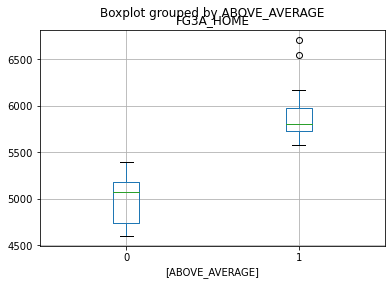

In [818]:
sums.boxplot(column=['FG3A_HOME'], by=["ABOVE_AVERAGE"])

In [819]:
sums

,HOME_TEAM,FG3A_HOME,HOME_TEAM_WINS,NUM_GAMES,WINNING_PROPORTION,ABOVE_AVERAGE
0,Jazz,6711.0,105,157,0.668790,1
1,Bucks,6544.0,105,171,0.614035,1
2,Warriors,6167.0,92,150,0.613333,1
3,Timberwolves,5993.0,66,148,0.445946,1
4,Trail Blazers,5970.0,71,152,0.467105,1
5,Rockets,5946.0,38,147,0.258503,1
6,Clippers,5825.0,93,167,0.556886,1
7,Nuggets,5812.0,94,158,0.594937,1
8,Mavericks,5790.0,92,153,0.601307,1
9,Celtics,5768.0,81,152,0.532895,1


In [820]:
sums

,HOME_TEAM,FG3A_HOME,HOME_TEAM_WINS,NUM_GAMES,WINNING_PROPORTION,ABOVE_AVERAGE
0,Jazz,6711.0,105,157,0.668790,1
1,Bucks,6544.0,105,171,0.614035,1
2,Warriors,6167.0,92,150,0.613333,1
3,Timberwolves,5993.0,66,148,0.445946,1
4,Trail Blazers,5970.0,71,152,0.467105,1
5,Rockets,5946.0,38,147,0.258503,1
6,Clippers,5825.0,93,167,0.556886,1
7,Nuggets,5812.0,94,158,0.594937,1
8,Mavericks,5790.0,92,153,0.601307,1
9,Celtics,5768.0,81,152,0.532895,1


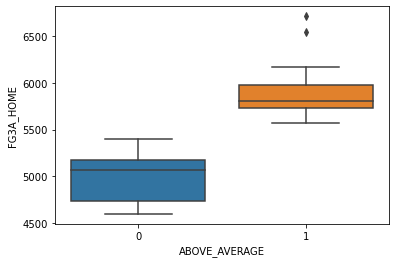

In [821]:
ax = sns.boxplot(x="ABOVE_AVERAGE", y="FG3A_HOME", data=sums)

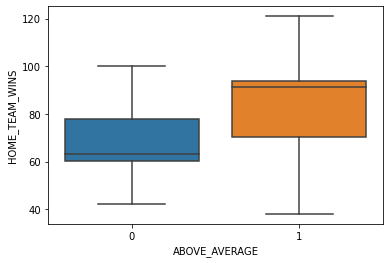

In [822]:
ax = sns.boxplot(x="ABOVE_AVERAGE", y="HOME_TEAM_WINS", data=sums)

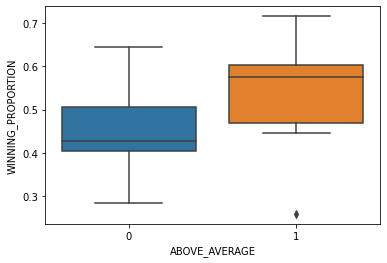

In [823]:
ax = sns.boxplot(x="ABOVE_AVERAGE", y="WINNING_PROPORTION", data=sums)

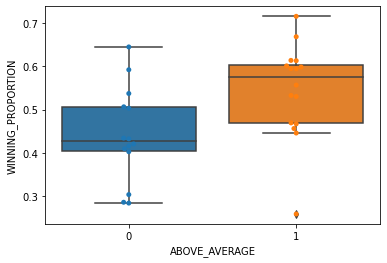

In [824]:
ax = sns.boxplot(x="ABOVE_AVERAGE", y="WINNING_PROPORTION", data=sums)
ax = sns.swarmplot(x="ABOVE_AVERAGE", y="WINNING_PROPORTION", data=sums)

In [825]:
px = sums[sums["ABOVE_AVERAGE"] == 1]["WINNING_PROPORTION"].sum() / len(sums[sums["ABOVE_AVERAGE"] == 1])

In [826]:
py = sums[sums["ABOVE_AVERAGE"] == 0]["WINNING_PROPORTION"].sum() / len(sums[sums["ABOVE_AVERAGE"] == 0])

In [827]:
prop = sums.groupby("ABOVE_AVERAGE")[["HOME_TEAM_WINS", "NUM_GAMES"]].sum()
prop.reset_index(inplace=True)

In [828]:
prop["LOSSES"] = prop["NUM_GAMES"] - prop["HOME_TEAM_WINS"]

In [829]:
prop.rename({"HOME_TEAM_WINS" : "WINS"}, axis = 1, inplace= True )

In [830]:
prop

,ABOVE_AVERAGE,WINS,NUM_GAMES,LOSSES
0,0,929,2098,1169
1,1,1367,2494,1127


In [706]:
px = prop[prop["ABOVE_AVERAGE"] == 1]["WINS"] / prop[prop["ABOVE_AVERAGE"] == 1]["NUM_GAMES"]
px = px[1]
py = prop[prop["ABOVE_AVERAGE"] == 0]["WINS"] / prop[prop["ABOVE_AVERAGE"] == 0]["NUM_GAMES"]
py = py[0]
nx = prop[prop["ABOVE_AVERAGE"] == 1]["NUM_GAMES"] 
nx = nx[1]
ny = prop[prop["ABOVE_AVERAGE"] == 0]["NUM_GAMES"]
ny = ny[0]

In [707]:
phat = ((nx*px) + (ny*py)) / (nx + ny)

In [708]:
statistic = (px - py) / (np.sqrt(phat * (1 - phat) * (1/nx + 1/ny)))

In [709]:
statistic

7.109862713826585

In [710]:
import scipy

In [711]:
revah_semech = [px - py - (scipy.stats.norm.ppf(0.975) * np.sqrt((px * (1-px) / nx) + (py * (1-py) / ny))), px - py + (scipy.stats.norm.ppf(0.975) * np.sqrt((px * (1-px) / nx) + (py * (1-py) / ny)))]

In [712]:
revah_semech

[0.07644645351766349, 0.1341791623550928]

In [713]:
from statistics import NormalDist
1 - NormalDist(mu=0, sigma=1).cdf(abs(statistic))

5.808686864838819e-13

In [714]:
prop

,ABOVE_AVERAGE,WINS,NUM_GAMES,LOSSES
0,0,929,2098,1169
1,1,1367,2494,1127


In [715]:
prop

,ABOVE_AVERAGE,WINS,NUM_GAMES,LOSSES
0,0,929,2098,1169
1,1,1367,2494,1127


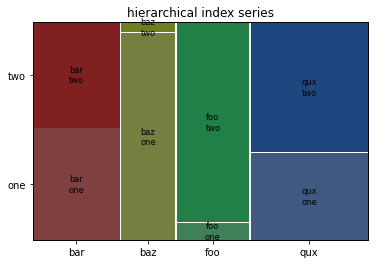

In [716]:
rand = np.random.random
from itertools import product
tuples = list(product(['bar', 'baz', 'foo', 'qux'], ['one', 'two']))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
data = pd.Series(rand(8), index=index)
mosaic(data, title='hierarchical index series')
plt.show()

In [717]:
from statsmodels.graphics.mosaicplot import mosaic

In [718]:
prop.set_index

<bound method DataFrame.set_index of    ABOVE_AVERAGE  WINS  NUM_GAMES  LOSSES
0              0   929       2098    1169
1              1  1367       2494    1127>

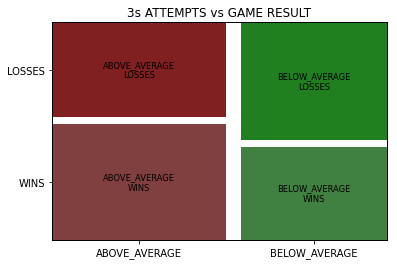

In [722]:
data = {('ABOVE_AVERAGE', 'WINS'): 1376, ('ABOVE_AVERAGE', 'LOSSES'): 1127, ('BELOW_AVERAGE', 'WINS'): 929, ('BELOW_AVERAGE', 'LOSSES'): 1169}
mosaic(data, gap=0.05, title='3s ATTEMPTS vs GAME RESULT')
plt.show()

In [723]:
sums["losses"] = sums["NUM_GAMES"] - sums["HOME_TEAM_WINS"]

In [724]:
sums[["HOME_TEAM","HOME_TEAM_WINS","losses"]]

,HOME_TEAM,HOME_TEAM_WINS,losses
0,Jazz,105,52
1,Bucks,105,66
2,Warriors,92,58
3,Timberwolves,66,82
4,Trail Blazers,71,81
5,Rockets,38,109
6,Clippers,93,74
7,Nuggets,94,64
8,Mavericks,92,61
9,Celtics,81,71


## מבחני חי פר קבוצה

In [155]:
sums.sample(4)

,HOME_TEAM,FG3A_HOME,HOME_TEAM_WINS,NUM_GAMES,WINNING_PROPORTION,ABOVE_AVERAGE
22,Pistons,5081.0,43,147,0.292517,0
28,Wizards,4618.0,66,152,0.434211,0
2,Warriors,6167.0,93,150,0.620000,1
4,Trail Blazers,5970.0,71,152,0.467105,1


In [346]:
dat["THREES_DEFICIT"] = dat["FG3M_HOME"] - dat["FG3M_AWAY"] 

dat["HOME_MORE_THREES"] = dat["THREES_DEFICIT"].apply(lambda x : 1 if x > 0 else 0)

In [405]:
thunder.groupby(["HOME_MORE_THREES","HOME_TEAM_WINS"])["GAME_ID"].nunique()

HOME_MORE_THREES  HOME_TEAM_WINS
0                 0                 74
                  1                 15
1                 0                 27
                  1                 29
Name: GAME_ID, dtype: int64

In [410]:
thunder[thunder["HOME_TEAM_WINS"] == 1]["GAME_ID"].nunique()

44

In [559]:
warriors = dat[dat["HOME_TEAM"] == "Warriors"]

warriors.groupby(["HOME_MORE_THREES"])["HOME_TEAM_WINS"].count()

warriors_chi = pd.DataFrame(warriors.groupby(["HOME_MORE_THREES","HOME_TEAM_WINS"])["GAME_ID"].nunique())

GUY = warriors_chi.reset_index()

GUY

guy = GUY.pivot(index = "HOME_TEAM_WINS", columns= "HOME_MORE_THREES", values= "GAME_ID")

guy = guy.reset_index()

guy

guy.rename({0 : "LESS_THREES", 1 : "MORE_THREES"}, axis= 1, inplace = True)


#guy.rename(index = "HOME_TEAM_WINS", inplace = True)
guy.drop(columns="HOME_TEAM_WINS", inplace=True)
#guy.rename_axis({"HOME_MORE_THREES" : "HOME_TEAM_WINS"}, axis = 1, inplace = True)
guy = guy.rename_axis(None, axis=1).rename_axis('HOME_TEAM_WINS', axis=0)
guy
# guy = guy[["LOSSES", "WINS"]]

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

print("the p-value is",chi2_contingency(guy)[1])

df = chi2_contingency(guy)[3]


df = pd.DataFrame(
    data=df[:,:], 
    index=[0,1],
    columns=["LESS_THREES","MORE_THREES"]
).round(2)

df

import pandas as pd   
from IPython.display import display_html 


df1_styler = guy.style.set_table_attributes("style='display:inline'").set_caption('observed')
df2_styler = df.style.set_table_attributes("style='display:inline'").set_caption('expected')
df2_t_styler = df.T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)
#display_html(df1_styler._repr_html_()+df2_styler._repr_html_() +df2_t_styler._repr_html_(), raw=True)

the p-value is 2.335253695081683e-08


,LESS_THREES,MORE_THREES
HOME_TEAM_WINS,,
0,36,22
1,15,77
,LESS_THREES,MORE_THREES
0,19.720000,38.280000
1,31.280000,60.720000


In [580]:
pvals = [1.9628193187638808e-05,3.7812193316238654e-06,1.100805534816949e-06,2.335253695081683e-08]

In [600]:
lista = [2.335253695081683e-08,1.100805534816949e-06,3.7812193316238654e-06,1.9628193187638808e-05]

In [601]:
import statsmodels.stats.multitest

In [602]:
statsmodels.stats.multitest.multipletests(lista,method = "holm")

(array([ True,  True,  True,  True]),
 array([9.34101478e-08, 3.30241660e-06, 7.56243866e-06, 1.96281932e-05]),
 0.012741455098566168,
 0.0125)

In [499]:
clippers = dat[dat["HOME_TEAM"] == "Clippers"]

clippers.groupby(["HOME_MORE_THREES"])["HOME_TEAM_WINS"].count()

clippers_chi = pd.DataFrame(clippers.groupby(["HOME_MORE_THREES","HOME_TEAM_WINS"])["GAME_ID"].nunique())

GUY = clippers_chi.reset_index()

GUY

guy = GUY.pivot(index = "HOME_TEAM_WINS", columns= "HOME_MORE_THREES", values= "GAME_ID")

guy = guy.reset_index()

guy

guy.rename({0 : "LESS_THREES", 1 : "MORE_THREES"}, axis= 1, inplace = True)


#guy.rename(index = "HOME_TEAM_WINS", inplace = True)
guy.drop(columns="HOME_TEAM_WINS", inplace=True)
#guy.rename_axis({"HOME_MORE_THREES" : "HOME_TEAM_WINS"}, axis = 1, inplace = True)
guy = guy.rename_axis(None, axis=1).rename_axis('HOME_TEAM_WINS', axis=0)
guy
# guy = guy[["LOSSES", "WINS"]]

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

print("the p-value is",chi2_contingency(guy)[1])

df = chi2_contingency(guy)[3]


df = pd.DataFrame(
    data=df[:,:], 
    index=[0,1],
    columns=["LESS_THREES","MORE_THREES"]
).round(2)

df

import pandas as pd   
from IPython.display import display_html 


df1_styler = guy.style.set_table_attributes("style='display:inline'").set_caption('observed')
df2_styler = df.style.set_table_attributes("style='display:inline'").set_caption('expected')
df2_t_styler = df.T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)
#display_html(df1_styler._repr_html_()+df2_styler._repr_html_() +df2_t_styler._repr_html_(), raw=True)

the p-value is 3.5729121311021794e-07


,LESS_THREES,MORE_THREES
HOME_TEAM_WINS,,
0,40,25
1,16,67
,LESS_THREES,MORE_THREES
0,24.590000,40.410000
1,31.410000,51.590000


In [497]:
sums

,HOME_TEAM,FG3A_HOME,HOME_TEAM_WINS,NUM_GAMES,WINNING_PROPORTION,ABOVE_AVERAGE
0,Jazz,6231.0,99,146,0.678082,1
1,Warriors,6167.0,92,150,0.613333,1
2,Timberwolves,5993.0,66,148,0.445946,1
3,Rockets,5946.0,38,147,0.258503,1
4,Bucks,5740.0,89,148,0.601351,1
5,Trail Blazers,5735.0,69,146,0.472603,1
6,Hornets,5723.0,68,149,0.456376,1
7,Celtics,5585.0,80,147,0.544218,1
8,Raptors,5575.0,69,147,0.469388,1
9,Mavericks,5545.0,89,146,0.609589,1


In [348]:
guy

HOME_TEAM_WINS,LESS_THREES,MORE_THREES
0,74,15
1,27,29


In [495]:
warriors = dat[dat["HOME_TEAM"] == "Warriors"]

warriors.groupby(["HOME_MORE_THREES"])["HOME_TEAM_WINS"].count()

warriors_chi = pd.DataFrame(warriors.groupby(["HOME_MORE_THREES","HOME_TEAM_WINS"])["GAME_ID"].nunique())

GUY = warriors_chi.reset_index()

GUY

guy = GUY.pivot(index = "HOME_MORE_THREES", columns= "HOME_TEAM_WINS", values= "GAME_ID")

guy = guy.reset_index()

guy.rename({0 : "LESS_THREES", 1 : "MORE_THREES"}, axis= 1, inplace = True)

guy = guy[["LESS_THREES", "MORE_THREES"]]

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

print("the p-value is",chi2_contingency(guy)[1])

df = chi2_contingency(guy)[3]

df = pd.DataFrame(
    data=df[:,:], 
    index=[0,1],
    columns=["LESS_THREES","MORE_THREES"]
).round(2)

df

import pandas as pd   
from IPython.display import display_html 


df1_styler = guy.style.set_table_attributes("style='display:inline'").set_caption('observed')
df2_styler = df.style.set_table_attributes("style='display:inline'").set_caption('expected')
df2_t_styler = df.T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)
#display_html(df1_styler._repr_html_()+df2_styler._repr_html_() +df2_t_styler._repr_html_(), raw=True)

the p-value is 2.335253695081683e-08


HOME_TEAM_WINS,LESS_THREES,MORE_THREES
0,36,15
1,22,77
,LESS_THREES,MORE_THREES
0,19.720000,31.280000
1,38.280000,60.720000


In [350]:
kings = dat[dat["HOME_TEAM"] == "Kings"]

kings.groupby(["HOME_MORE_THREES"])["HOME_TEAM_WINS"].count()

kings_chi = pd.DataFrame(kings.groupby(["HOME_MORE_THREES","HOME_TEAM_WINS"])["GAME_ID"].nunique())

GUY = kings_chi.reset_index()

GUY

guy = GUY.pivot(index = "HOME_MORE_THREES", columns= "HOME_TEAM_WINS", values= "GAME_ID")

guy = guy.reset_index()

guy.rename({0 : "LESS_THREES", 1 : "MORE_THREES"}, axis= 1, inplace = True)

guy = guy[["LESS_THREES", "MORE_THREES"]]

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

print("the p-value is",chi2_contingency(guy)[1])

df = chi2_contingency(guy)[3]

df = pd.DataFrame(
    data=df[:,:], 
    index=[0,1],
    columns=["LESS_THREES","MORE_THREES"]
).round(2)

df

import pandas as pd   
from IPython.display import display_html 


df1_styler = guy.style.set_table_attributes("style='display:inline'").set_caption('observed')
df2_styler = df.style.set_table_attributes("style='display:inline'").set_caption('expected')
df2_t_styler = df.T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)
#display_html(df1_styler._repr_html_()+df2_styler._repr_html_() +df2_t_styler._repr_html_(), raw=True)

the p-value is 3.781219331623856e-06


HOME_TEAM_WINS,LESS_THREES,MORE_THREES
0,65,21
1,23,40
,LESS_THREES,MORE_THREES
0,50.790000,35.210000
1,37.210000,25.790000


In [361]:
clippers = dat[dat["HOME_TEAM"] == "Magic"]

clippers.groupby(["HOME_MORE_THREES"])["HOME_TEAM_WINS"].count()

clippers_chi = pd.DataFrame(clippers.groupby(["HOME_MORE_THREES","HOME_TEAM_WINS"])["GAME_ID"].nunique())

GUY = clippers_chi.reset_index()

GUY

guy = GUY.pivot(index = "HOME_MORE_THREES", columns= "HOME_TEAM_WINS", values= "GAME_ID")

guy = guy.reset_index()

guy.rename({0 : "LESS_THREES", 1 : "MORE_THREES"}, axis= 1, inplace = True)

guy = guy[["LESS_THREES", "MORE_THREES"]]

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

print("the p-value is",chi2_contingency(guy)[1])

df = chi2_contingency(guy)[3]

df = pd.DataFrame(
    data=df[:,:], 
    index=[0,1],
    columns=["LESS_THREES","MORE_THREES"]
).round(2)

df

import pandas as pd   
from IPython.display import display_html 


df1_styler = guy.style.set_table_attributes("style='display:inline'").set_caption('observed')
df2_styler = df.style.set_table_attributes("style='display:inline'").set_caption('expected')
df2_t_styler = df.T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)
#display_html(df1_styler._repr_html_()+df2_styler._repr_html_() +df2_t_styler._repr_html_(), raw=True)

the p-value is 0.01061939796835872


HOME_TEAM_WINS,LESS_THREES,MORE_THREES
0,78,21
1,28,21
,LESS_THREES,MORE_THREES
0,70.910000,28.090000
1,35.090000,13.910000


In [352]:
df = chi2_contingency(guy)


In [353]:
df

(25.91226808811932,
 3.5729121311021857e-07,
 1,
 array([[24.59459459, 31.40540541],
        [40.40540541, 51.59459459]]))